# <center>Assignment 1 Submission for Adarsh Pal (180032)</center>

In [3]:
import numpy as np
import numpy.linalg as lin
import pandas as pd
import random
from matplotlib import pyplot as plt

# Question 1 (a): Training a k-nearest neighbors regression model

Firstly, we decide which columns are nominal/categorical in nature and which ones are cardinal/real valued. The all_floats array stores the columns which are cardinal/real valued while the all_categories array stores the ones that are nominal/categorical.

In [4]:
colnames=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
all_floats=['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']
all_categories=['symboling', 'make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

### Reading the Data:
We read the data in the 'data' variable. Note that we are dropping the <b>normalized-losses</b> column because it has a larger number of missing values. After dropping the normalized-losses column, 'data' contains 205 examples, each having 25 features.

In [5]:
data=pd.read_csv('imports-85.data',names=colnames)
data=data.drop('normalized-losses',axis=1)
data.shape

(205, 25)

### Cleaning the Data:
A number of example still have missing features, and hence we will drop those examples. After deleting the examples, the 'cleaned_data' variable contains 193 examples, each having 25 features.

In [7]:
cleaned_data = data[(data != '?').all(axis=1)]
cleaned_data.shape

/home/palad/.local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(193, 25)

In [8]:
cleaned_y=cleaned_data['price']
cleaned_y.shape

(193,)

 The 'floats' variable stores the cardinal features of the cleaned_data after features scaling.
In a similar way, the 'categories' variable stores the ordinal/categorical features of the cleaned_data.

In [9]:
floats=pd.DataFrame()
for i in all_floats:
    zz=cleaned_data[i].astype('float')
    maximum=np.max(zz)
    minimum=np.min(zz)
    avg=np.mean(zz)
    ranges=maximum-minimum
    floats[i]=(zz-avg)/ranges
dic={'eight':8, 'five':5, 'four':4, 'six':6, 'three':3, 'twelve':12, 'two':2}
floats['num-of-cylinders']=0.1*np.array([dic[i] for i in cleaned_data['num-of-cylinders']])
floats['num-of-doors']=0.5*np.array([dic[i] for i in cleaned_data['num-of-doors']])
all_floats.append('num-of-cylinders')
all_floats.append('num-of-doors')

In [10]:
categories=pd.DataFrame()
for i in all_categories:
    categories[i]=cleaned_data[i].astype('category')

## Performing train-test split:
We perform an 80-20 train-test split on the input data for training and validation.

In [12]:
df = pd.concat([floats,categories,cleaned_y],axis=1)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [13]:
ytrain=train['price']
xtrain=train.drop('price',axis=1)
ytest=test['price']
xtest=test.drop('price',axis=1)

##  Finding K nearest neighbours:
The distance metric used for K nearest neighbours  is defined as follows:  
For $p=(p_1,p_2,...,p_n,p'_1,p'_2,...,p'_m)$ and $q=(q_1,q_2,...,q_n,q'_1,q'_2,...,q'_m)$ where $p_i$ are cardinal values and $p_i'$ are nominal values, we define distance  
$d(p,q)$=$\sum_{i=1}^{n} (p_i-q_i)^2 + \sum_{i=1}^{m} \{ 1$ if $(p'_i != q'_i)$ otherwise $0\}$

In [14]:
def knn(xtest,k,xtrain,ytrain):
#     xtrfloat: stores cardinal values for xtrain
    xtrfloat=xtrain[all_floats].to_numpy()
#     xtrcat: stores categorical values for xtrain
    xtrcat=xtrain[all_categories].to_numpy()
#     xfloat: stores cardinal values for xtest
    xfloat=xtest[all_floats].to_numpy(dtype='float')
#     xcat: stores categorical values for xtest
    xcat=xtest[all_categories].to_numpy()
#     eudist: stores square of euclidean distance for real-valued features
    eudist=lin.norm(xfloat-xtrfloat,axis=1)**2
#     cdist: stores non-equality distance for cardinal features
    eq=np.equal(xcat,xtrcat)
    cdist=np.sum(1-eq,axis=1)
    ytrain=ytrain.to_numpy(dtype='float')
#     knearest: stores the prices of k nearest neighbours for the test data entered.
    knearest=ytrain[np.argsort(eudist+cdist)][:k]
#     Finally, we return the mean of the prices for the k nearest neighbours
    return np.mean(knearest)

## Reporting the validation set performance using root mean squared error for different values of k:
We iterate through different values of k (from 1 to 30) and find The RMSE on the validation set.

In [15]:
yt=ytest.to_numpy(dtype='float')
# rm stores the RMSE's for different values of k
rm=list()
for k in range(1,31):
    q=xtest.apply(knn,axis=1,args=(k,xtrain,ytrain))
    rmse=np.sqrt(np.sum((q-yt)**2)/len(yt))
    print(k,rmse)
    rm.append(rmse)

1 2778.635840905324
2 2268.54106976869
3 2757.7864801688356
4 2895.8880607701954
5 3155.1951982549213
6 3637.1132385763403
7 3792.083918053296
8 3717.4206814305094
9 3757.0926285307733
10 3670.5433708165683
11 3835.8640973339543
12 3754.153882785217
13 3858.498638164955
14 3769.2324328856243
15 3789.115398550875
16 3921.6971283120447
17 4043.9946395974357
18 4154.840003981389
19 4199.518145985482
20 4274.921718780888
21 4259.737848601299
22 4330.841118307929
23 4402.669083032647
24 4446.553420107101
25 4471.610702221089
26 4519.2481741927895
27 4512.990977932884
28 4504.06410752166
29 4482.83033284815
30 4525.257910231876


### Plot for RMSE vs k:

In [16]:
ss=np.arange(1,31)
rms=np.array(rm)
plt.plot(ss,rms)

# Question 1 (b): Finding an optimal k for this model using cross-validation:
For this, we will use 5-fold cross-validation.

In [17]:
y=df['price']
x=df.drop('price',axis=1)

In [18]:
# error_k: stores the avg validation error for different values of k
error_k=list()
for k in range(1,31):
#     rm: stores the different RMSEs found for a given value of k
    rm=list()
    n=y.size
#     kfold: stores the k in k-fold cross validation
    kfold=5
    q=np.arange(n)
    np.random.shuffle(q)
    zz=np.array_split(q,kfold)
    print(k,end=" ")
    for i in zz:
        b=np.zeros(n)
        b[i] = 1
        msk=np.array(b,dtype='bool')
#         Splitting into training and validation data 
        xtest=x[msk]
        ytest=y[msk]
        xtrain=x[~msk]
        ytrain=y[~msk]
        yt=ytest.to_numpy(dtype='float')
        q=xtest.apply(knn,axis=1,args=(k,xtrain,ytrain))
#         Finding the RMSE for the given validation data
        rmse=np.sqrt(np.sum((q-yt)**2)/len(yt))
        rm.append(rmse)
    rm=np.array(rm)
    error_k.append(np.mean(rm))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

In [19]:
ss=np.arange(1,31)
# print(min(error_k))
errk=np.array(error_k)
plt.plot(ss,errk)
print("Best Value of k:", 1+np.argmin(errk), "and RMSE for best value of k=",np.min(errk))

Best Value of k: 3 and RMSE for best value of k= 3159.732067845767


 # Q1.(c) Introduce L0 regularization into this setup
 Introducing l0 regularization into the model won't have any difference because there are no weights to be trained in k nearest neighbour regression

# Q1. (d)  Check whether L0 regularization improves generalization
As stated above, L0 regularization does not improve generalization for the same reason as above.
Also, getting an information about the importance of features in k nearest neighbour regression is also not possible.

In [20]:
def feature_knn(xtest,k,xtrain,ytrain,feature):
    xtrfloat=xtrain[feature].to_numpy()
    xfloat=xtest[feature]
#     print(xfloat)
#     print(xtrfloat)
    eudist=lin.norm(xfloat-xtrfloat)**2
    ytrain=ytrain.to_numpy(dtype='float')
    knearest=ytrain[np.argsort(eudist)][:k]
    return np.mean(knearest)
def singlefeatures():
    d=dict()
    for f in all_floats:
        msk = np.random.rand(len(df)) < 0.8
        train = df[msk]
        test = df[~msk]
        ytrain=train['price']
        xtrain=train.drop('price',axis=1)
        ytest=test['price']
        xtest=test.drop('price',axis=1)
        
        yt=ytest.to_numpy(dtype='float')
        q=xtest.apply(feature_knn,axis=1,args=(3,xtrain,ytrain,f))
        rmse=np.sqrt(np.sum((q-yt)**2)/len(yt))
        d[f]=rmse;
    return d
dic=singlefeatures();

In [21]:
feature_rmse=pd.DataFrame(dic.items())
feature_rmse=feature_rmse.rename({0:'features',1:'RMSE'},axis=1)

In [22]:
feature_rmse.sort_values(by='RMSE',axis=0)

features         RMSE
14       num-of-doors  5942.690291
10           peak-rpm  6860.696608
6                bore  6951.973598
8   compression-ratio  7377.579886
3              height  7788.184932
0          wheel-base  7810.296190
13   num-of-cylinders  8118.686557
5         engine-size  8532.250791
9          horsepower  8557.019716
1              length  8650.150578
11           city-mpg  8861.301738
2               width  8912.252110
4         curb-weight  8983.383023
12        highway-mpg  8986.738106
7              stroke  9228.205032

We can get a rough idea of the major features that contribute towards the price of a car using the table above. The lower the RMSE Value, the higher the expected contribution

# Q2 (a) Training a decision tree classification model:
Question. Train a decision tree classification model using information gain as the splitting criterion and
using only single feature decision stumps at all non-leaf nodes and majority votes at leaf nodes, and
report its validation set performance using % accuracy

In [145]:
import numpy as np
from numpy import linalg as lin
import pandas as pd
from matplotlib import pyplot as plt
import time as t

Firstly, we decide which columns are nominal/categorical in nature and which ones are cardinal/real valued. The all_floats array stores the columns which are cardinal/real valued while the all_categories array stores the ones that are nominal/categorical.

In [146]:
colnames=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',' <=50K']
all_floats=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
all_categories=['workclass','education', 'marital-status','occupation','relationship','race','sex','native-country']

In [147]:
print("No of cardinal features:", len(all_floats))
print("No of cardinal features:", len(all_categories))

No of cardinal features: 6
No of cardinal features: 8


### Reading the Data:
We read the data in the 'data' variable. 'data' contains 32561 examples, each having 15 features which includes the y feature ('<=50K') which we need to predict.

In [124]:
data=pd.read_csv('adult.data',names=colnames,index_col=False)
data.shape

(32561, 15)

### Cleaning the Data:
A number of example still have missing features, and hence we will drop those examples. After deleting the examples, the 'cleaned_data' variable contains 30162 examples, each having 15 features.

In [125]:
cleaned_data = data[(data != ' ?').all(axis=1)]
cleaned_data.shape

/home/palad/.local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(30162, 15)

'cleaned_y' stores the category '<=50K' of each example which needs to be predicted. It is a column vector of size 30162.

In [126]:
cleaned_y=cleaned_data[' <=50K']==' <=50K'
cleaned_y.shape

(30162,)

 The 'floats' variable stores the cardinal features of the cleaned_data after features scaling.
In a similar way, the 'categories' variable stores the ordinal/categorical features of the cleaned_data.

In [127]:
floats=pd.DataFrame()
for i in all_floats:
    floats[i]=cleaned_data[i].astype('float')
categories=pd.DataFrame()
for i in all_categories:
    categories[i]=cleaned_data[i].astype('category')

In [128]:
df = pd.concat([floats,categories,cleaned_y],axis=1)
df

age    fnlwgt  education-num  capital-gain  capital-loss  \
0      39.0   77516.0           13.0        2174.0           0.0   
1      50.0   83311.0           13.0           0.0           0.0   
2      38.0  215646.0            9.0           0.0           0.0   
3      53.0  234721.0            7.0           0.0           0.0   
4      28.0  338409.0           13.0           0.0           0.0   
...     ...       ...            ...           ...           ...   
32556  27.0  257302.0           12.0           0.0           0.0   
32557  40.0  154374.0            9.0           0.0           0.0   
32558  58.0  151910.0            9.0           0.0           0.0   
32559  22.0  201490.0            9.0           0.0           0.0   
32560  52.0  287927.0            9.0       15024.0           0.0   

       hours-per-week          workclass    education       marital-status  \
0                40.0          State-gov    Bachelors        Never-married   
1                13.0   Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                40.0            Private      HS-grad             Divorced   
3                40.0            Private         11th   Married-civ-spouse   
4                40.0            Private    Bachelors   Married-civ-spouse   
...               ...                ...          ...                  ...   
32556            38.0            Private   Assoc-acdm   Married-civ-spouse   
32557            40.0            Private      HS-grad   Married-civ-spouse   
32558            40.0            Private      HS-grad              Widowed   
32559            20.0            Private      HS-grad        Never-married   
32560            40.0       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  native-country  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2       Handlers-cleaners   Not-in-family   White     Male   United-States   
3       Handlers-cleaners         Husband   Black     Male   United-States   
4          Prof-specialty            Wife   Black   Female            Cuba   
...                   ...             ...     ...      ...             ...   
32556        Tech-support            Wife   White   Female   United-States   
32557   Machine-op-inspct         Husband   White     Male   United-States   
32558        Adm-clerical       Unmarried   White   Female   United-States   
32559        Adm-clerical       Own-child   White     Male   United-States   
32560     Exec-managerial            Wife   White   Female   United-States   

        <=50K  
0        True  
1        True  
2        True  
3        True  
4        True  
...       ...  
32556    True  
32557   False  
32558    True  
32559    True  
32560   False  

[30162 rows x 15 columns]

## Performing train-test split:
We perform an 80-20 train-test split on the input data for training and validation.

In [129]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [130]:
ytrain=train[' <=50K']
xtrain=train.drop(' <=50K',axis=1)
ytest=test[' <=50K']
xtest=test.drop(' <=50K',axis=1)

In [131]:
xtest.shape

(6014, 14)

In [156]:
features=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
print(len(features))

14


## Building the Decision Tree:

In [159]:
class Node:
#     A node stores its own depth (root = depth 0), its parent and children information, its feature
#     using which it is further divided, the threshold for the feature in case the feature is real-valued
#     and the enumerations for the feature in case it is categorical.

#     Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, parent = None ):
        self.depth = depth
        self.parent = parent
        self.children=list()
        self.isLeaf = True
        self.feature=None
        self.featurelist=None
        self.thresh=None
        self.entropy=0.0
    def predict( self, data ):
        # If I am a leaf I can predict rightaway
        if self.isLeaf:
            return self.label
        # Else I have to ask one of my children to do the job
        else:
#             if self.feature is categorical then we need to go to one of the various children, based on the category for the feature.
            if self.feature in all_categories:
                return self.children[self.featurelist.index(data[self.feature])].predict(data)
#             Otherwise if the feature is real-valued then we need to move to a child based on the threshold
            elif data[self.feature] <= self.thresh:
                return self.children[0].predict( data )
            else:
                return self.children[1].predict( data )
            
    # Helper function for finding the information gain for the real-valued feature of the node
    def IG( self, nPos, nNeg ):
        nTot = nPos + nNeg
        # Find the proportion of the positives and negatives in that node
        pPos = nPos/nTot
        pNeg = nNeg/nTot
        if(pPos>0 and pNeg>0):
            ig = -(pPos)*np.log(pPos)-(pNeg)*np.log(pNeg)
        else:
            ig=0
        return ig       
    # Helper function for finding the information gain for the categorical feature of the node
    def Info(self,pos,tot):
        # Find the proportion of the positives and negatives in that node
        ppos=pos/tot
        pneg=1-ppos
        ig=0
        ppos=ppos.tolist()
        pneg=pneg.tolist()
        for i in range(len(ppos)):
            if(ppos[i]==0 or ppos[i]==1):
                continue
            ig+=-(ppos[i]*np.log(ppos[i]))-(pneg[i]*np.log(pneg[i]))
        return ig
    def getStump( self, X, y ):
        #parententropy: stores the entropy of the parent of the current node
        parententropy=0.0
        if self.parent is not None:
            parententropy=self.parent.entropy
            
        # How many data points do I have at this node?
        n = y.size
        bestObjective = float('-inf')
        bestFeat = None
        bestThresh=None
        bestFeaturelist=None
        # For each of the features in the data
        for f in features:
            # Do not use the same feature as used by the parent node
            if self.parent is not None and f == self.parent.feature:
                continue
#             If feature is categorical
            if f in all_categories:
                featurelist=X[f].cat.categories
                pos=list();
                tot=list();
                for i in featurelist:
                    binary=(X[f]==i)
                    Xcur=X[binary]
                    Ycur=y[binary]
                    if(Ycur.size>0):
                        pos.append(np.sum(Ycur))
                        tot.append(Ycur.size)
                pos=np.array(pos)
                tot=np.array(tot)
                ret=self.Info(pos,tot)
#                 candidateObjective: stores the information gain if we split using the categorical feature f
                candidateObjective=parententropy-np.sum(-tot/n*ret)
#                 print(pos)
#                 print(tot)
#                 print(ret)
                if candidateObjective > bestObjective:
                        bestObjective = candidateObjective
                        bestFeat = f
                        bestThresh=None
                        bestFeaturelist = featurelist.to_list()
            else:
            # Find out all values at which we can threshold that feature
                x=X[f].to_numpy()
                yp=y.to_numpy()
                candidateThresholds = np.sort(x)
                idx = np.argsort(x)
                # The cumulative sum trick used here will work only if labels are binary 
                ySorted = yp[idx]
                yCum = np.cumsum( ySorted )
                yCumRev = np.cumsum( ySorted[::-1] )[::-1]
                # For each possible threshold (except the ones at the extreme)
                for j in range( 1, candidateThresholds.size-1 ):
#                 candidateObjective: stores the information gain if we split using the real-valued feature f using the threshold: candidateThresholds[j]
                    candidateObjective =parententropy-1.0*(j+1)/n * self.IG( (yCum[j] + j+1)/2, (j+1 - yCum[j])/2 ) \
                                        -1.0*(n-j-1)/n * self.IG( (yCumRev[j+1] + n-j-1)/2, (n-j-1 - yCumRev[j+1])/2 )
                    if candidateObjective > bestObjective:
                        bestObjective = candidateObjective
                        bestFeat = f
                        bestThresh = candidateThresholds[j]
                        bestFeaturelist = None
                # Can try LwP decision stump as well
#                 bestThresh = (np.mean(X[y > 0, bestFeat]) + np.mean(X[y < 0, bestFeat]))/2
#         print(bestFeat,bestThresh)
        return (bestFeat, bestThresh,bestFeaturelist)
            
    def train( self, X, y, maxLeafSize, maxDepth):
#         print(self.depth)
        n=y.size
#         Finding the entropy of the current node
        self.entropy=self.Info(np.array([np.sum(y),]),np.array([n,]))
        # If too few data points are present, or else if this node is too deep in the tree, make this a leaf
        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.label = np.sum(y)>=(n/2);
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump
            (f,t,flist) = self.getStump( X, y )
            self.feature=f
            self.thresh=t
            self.featurelist=flist
#             If feature is categorical
            if self.feature in all_categories:
#                 Create children nodes and train them recursively
                for i in self.featurelist:
                    binary=(X[f]==i)
                    Xcur=X[binary]
                    Ycur=y[binary]
                    self.children.append(Node( depth = self.depth + 1, parent = self))
                    self.children[-1].train(Xcur,Ycur,maxLeafSize,maxDepth)
            else:
#                 Create two children nodes based on the threshold and train them recursively
                binary=(X[f]<=self.thresh)
                Xleft=X[binary]
                Yleft=y[binary]
                Xright=X[~binary]
                Yright=y[~binary]
                self.children.append(Node( depth = self.depth + 1, parent = self))
                self.children.append(Node( depth = self.depth + 1, parent = self))
                self.children[0].train(Xleft,Yleft,maxLeafSize,maxDepth)
                self.children[1].train(Xright,Yright,maxLeafSize,maxDepth)
class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, xt):
        return self.root.predict(xt)
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )

/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


##### Creating the first model for the tree and training on xtrain and ytrain data:

In [111]:
DT = Tree( maxLeafSize = 5, maxDepth = 2)
DT.train(xtrain,ytrain)

In [135]:
# ypred: stores the predicted values for xtrain data
ypred=list()
for i in range(ytrain.size):
#     if(i%1000==0):
#         print(i,end=" ")
    ypred.append(DT.predict(xtrain.iloc[i]))
pre=np.array(ypred)
# training_accuracy: stores the fraction of data correctly predicted
training_accuracy=np.sum(pre==ytrain)/ytrain.size
print("Training accuracy:", training_accuracy)

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 

0.7534371376511513

In [138]:
# ytestpred: stores the predicted values for xtest data
yvalidpred=list()
for i in range(ytest.size):
#     if(i%1000==0):
#         print(i,end=" ")
    yvalidpred.append(DT.predict(xtest.iloc[i]))
pre=np.array(yvalidpred)
validation_accuracy=np.sum(pre==ytest)/ytest.size
print("Validation accuracy:", validation_accuracy)

0 1000 2000 3000 4000 5000 6000 

0.7532424343199202

# Question 2(b): Finding an optimal depth for this model using cross-validation:
For this, we will use 5-fold cross-validation.

In [139]:
y=df[' <=50K']
x=df.drop(' <=50K',axis=1)

In [233]:
def k_fold_cross_validation(depth):
    n=y.size
#     kfold: stores the key for k-fold Cross validation
    kfold=5
#     Performing random splitting for k fold Cross validation
    q=np.arange(n)
    np.random.shuffle(q)
    zz=np.array_split(q,kfold)
    print(depth)
#     train_acc: stores the training accuracy for the different splittings at a given depth
    train_acc=list()
#     test_acc: stores the test accuracy for the different splittings at a given depth
    test_acc=list()
    j=1
    for i in zz:
        print(j,'of 5')
        j+=1
        b=np.zeros(n)
        b[i] = 1
#          Splitting into training and validation data
        msk=np.array(b,dtype='bool')
        xtest=x[msk]
        ytest=y[msk]
        xtrain=x[~msk]
        ytrain=y[~msk]
#         Training the model
        DT = Tree( maxLeafSize = 5, maxDepth = depth)
        DT.train(xtrain,ytrain)
#         pred: Stores the predicted value for the training data
#         pred: Stores the predicted value for the training dat
        pred=list()
        for i in range(ytrain.size):
            pred.append(DT.predict(xtrain.iloc[i]))
        pre=np.array(pred)
#          appending the training accuracy
        train_acc.append(np.sum(pre==ytrain)/ytrain.size);
        print(np.sum(pre==ytrain)/ytrain.size, end=" ")
#         print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

#         pred: Stores the predicted value for the validation data
        pred=list()
        for i in range(ytest.size):
            pred.append(DT.predict(xtest.iloc[i]))
        pre=np.array(pred)
        print(np.sum(pre==ytest)/ytest.size)
#          Appending the test accuracy
        test_acc.append(np.sum(pre==ytest)/ytest.size)
#     Returning the mean training and test accuracies for the given depth
    return (np.mean(np.array(train_acc)),np.mean(np.array(test_acc)))

In [144]:
#Finding the training and test accuracies for depth=1
(train1,test1)=k_fold_cross_validation(1)

1
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


0.7517510050147126 0.7467263384717387
2 of 5
0.751709561109039 0.7485496436267197
3 of 5
0.7477828429341069 0.7642572944297082
4 of 5
0.7527144633236635 0.7445291777188329
5 of 5
0.7515540820555325 0.7491710875331565


In [152]:
#Finding the training and test accuracies for depth=2
(train2,test2)=k_fold_cross_validation(2)

2
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


0.7549007418459116 0.7473893585280955
2 of 5
0.7751668117203365 0.7697662854301343
3 of 5
0.7538334024036469 0.751657824933687
4 of 5
0.7524658101947783 0.7543103448275862
5 of 5
0.7540406133443845 0.7506631299734748


In [155]:
#Finding the training and test accuracies for depth=3
(train3,test3)=k_fold_cross_validation(3)

3
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


0.7858593393841435 0.7777225261064147
2 of 5
0.7841186953458494 0.7821979114868225
3 of 5
0.7858267716535433 0.7773541114058355
4 of 5
0.7834645669291339 0.7823275862068966
5 of 5
0.7863240779113138 0.773209549071618


In [158]:
#Finding the training and test accuracies for depth=4
(train4,test4)=k_fold_cross_validation(4)

4
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


0.7971735256330557 0.7848499917122493
2 of 5
0.796759086576319 0.7840212166418035
3 of 5
0.7956485702445089 0.791445623342175
4 of 5
0.7956071280563614 0.7899535809018567
5 of 5
0.7994198093659345 0.7763594164456233


In [161]:
#Finding the training and test accuracies for depth=5
(train5,test5)=k_fold_cross_validation(5)

5
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


0.8255211571138464 0.8199900546991546
2 of 5
0.8308259770400762 0.8050721034311288
3 of 5
0.8282221301284708 0.8244363395225465
4 of 5
0.8304600082884376 0.8060344827586207
5 of 5
0.8308329879817654 0.8156498673740054


In [163]:
#Finding the training and test accuracies for depth=6
(train6,test6)=k_fold_cross_validation(6)

6
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


0.8339757138712752 0.8181667495441737
2 of 5
0.8349703676074434 0.8148516492623902
3 of 5
0.8324492333195193 0.8181366047745358
4 of 5
0.8372565271446333 0.8115053050397878
5 of 5
0.8323663489432243 0.820789124668435


In [169]:
#Finding the training and test accuracies for depth=7
(train7,test7)=k_fold_cross_validation(7)

7
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


0.8351775871358117 0.8189955246146196
2 of 5
0.834887479796096 0.8184982595723521
3 of 5
0.8345213427268959 0.819131299734748
4 of 5
0.8357231661831744 0.8214522546419099
5 of 5
0.8380024865312888 0.8101790450928382


In [172]:
#Finding the training and test accuracies for depth=8
(train8,test8)=k_fold_cross_validation(8)

8
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


0.8370011189854532 0.8140228741919443
2 of 5
0.835260474947159 0.8158461793469253
3 of 5
0.8372565271446333 0.8086870026525199
4 of 5
0.8365520099461251 0.8110079575596817
5 of 5
0.833360961458765 0.82907824933687


In [234]:
#Finding the training and test accuracies for depth=9
(train9,test9)=k_fold_cross_validation(9)

9
1 of 5


/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


0.8377056653819056 0.814685894248301
2 of 5
0.8355108929009186 0.8076773751601741
3 of 5
0.8372977759549526 0.8102721138046343
4 of 5
0.830415057280282 0.8085066644774588
5 of 5
0.8353381932552215 0.8090043982718773


In [241]:
train_acc=np.array([train1, train2, train3, train4, train5, train6, train7, train8, train9])
test_acc=np.array([test1, test2, test3, test4, test5, test6, test7, test8, test9])

In [242]:
print(train_acc)
print(test_acc)

[0.75110239 0.75808148 0.78511869 0.79692162 0.82917245 0.83420364
 0.83566241 0.83588622 0.83525352]
[0.75064671 0.75475739 0.77856234 0.78532597 0.81423657 0.81668989
 0.81765128 0.81572845 0.81002929]


In [244]:
#Plot for training accuracy
ss=np.arange(1,train_acc.size+1)
plt.plot(ss,train_acc)

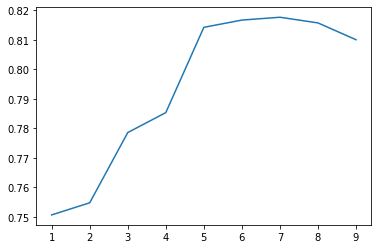

In [246]:
#Plot for test accuracy
ss=np.arange(1,test_acc.size+1)
plt.plot(ss,test_acc)

From the graph for Validation error, it looks like depth=7 may be the optimal depth

# Q2 (c) Using more complex splitting criteria than single-feature decision stumps for better test set performance

In [247]:
#Creating new dataframe
newdf=df
newdf

age    fnlwgt  education-num  capital-gain  capital-loss  \
0      39.0   77516.0           13.0        2174.0           0.0   
1      50.0   83311.0           13.0           0.0           0.0   
2      38.0  215646.0            9.0           0.0           0.0   
3      53.0  234721.0            7.0           0.0           0.0   
4      28.0  338409.0           13.0           0.0           0.0   
...     ...       ...            ...           ...           ...   
32556  27.0  257302.0           12.0           0.0           0.0   
32557  40.0  154374.0            9.0           0.0           0.0   
32558  58.0  151910.0            9.0           0.0           0.0   
32559  22.0  201490.0            9.0           0.0           0.0   
32560  52.0  287927.0            9.0       15024.0           0.0   

       hours-per-week          workclass    education       marital-status  \
0                40.0          State-gov    Bachelors        Never-married   
1                13.0   Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                40.0            Private      HS-grad             Divorced   
3                40.0            Private         11th   Married-civ-spouse   
4                40.0            Private    Bachelors   Married-civ-spouse   
...               ...                ...          ...                  ...   
32556            38.0            Private   Assoc-acdm   Married-civ-spouse   
32557            40.0            Private      HS-grad   Married-civ-spouse   
32558            40.0            Private      HS-grad              Widowed   
32559            20.0            Private      HS-grad        Never-married   
32560            40.0       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  native-country  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2       Handlers-cleaners   Not-in-family   White     Male   United-States   
3       Handlers-cleaners         Husband   Black     Male   United-States   
4          Prof-specialty            Wife   Black   Female            Cuba   
...                   ...             ...     ...      ...             ...   
32556        Tech-support            Wife   White   Female   United-States   
32557   Machine-op-inspct         Husband   White     Male   United-States   
32558        Adm-clerical       Unmarried   White   Female   United-States   
32559        Adm-clerical       Own-child   White     Male   United-States   
32560     Exec-managerial            Wife   White   Female   United-States   

        <=50K  
0        True  
1        True  
2        True  
3        True  
4        True  
...       ...  
32556    True  
32557   False  
32558    True  
32559    True  
32560   False  

[30162 rows x 15 columns]

In [248]:
# Feature Scaling the real-valued features
for i in all_floats:
    zz=newdf[i].to_numpy()
    avg=np.mean(zz)
    ran=np.max(zz)-np.min(zz)
    newdf[i]=(newdf[i]-avg)/ran

In [249]:
#Combining a few features to new ones
newdf['capital']=newdf['capital-gain']-newdf['capital-loss']
newdf['efficiency']=newdf['age']+newdf['hours-per-week']
features=['efficiency', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital', 'native-country']

In [250]:
msk = np.random.rand(len(df)) < 0.8
train = newdf[msk]
test = newdf[~msk]
ytrain=train[' <=50K']
xtrain=train.drop(' <=50K',axis=1)
ytest=test[' <=50K']
xtest=test.drop(' <=50K',axis=1)

In [251]:
DT = Tree( maxLeafSize = 5, maxDepth = 7)
DT.train(xtrain,ytrain)

/home/palad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


In [252]:
# ypred: stores the predicted values for xtrain data
ypred=list()
for i in range(ytrain.size):
    ypred.append(DT.predict(xtrain.iloc[i]))
pre=np.array(ypred)
# training_accuracy: stores the fraction of data correctly predicted
training_accuracy=np.sum(pre==ytrain)/ytrain.size
print("Training accuracy:", training_accuracy)

Training accuracy: 0.8354509477192251


In [253]:
# ytestpred: stores the predicted values for xtest data
yvalidpred=list()
for i in range(ytest.size):
#     if(i%1000==0):
#         print(i,end=" ")
    yvalidpred.append(DT.predict(xtest.iloc[i]))
pre=np.array(yvalidpred)
validation_accuracy=np.sum(pre==ytest)/ytest.size
print("Validation accuracy:", validation_accuracy)

Validation accuracy: 0.8169563098911807


Thus, we see that we do not gain much accuracy using more complex splitting criteria than single-feature decision stumps. We will have to use extremely complex criteria which might then cause overfitting.